# Actividad Kmeans de Los Ángeles

### Mónica Ibarra Herrera

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
df=pd.read_csv('C:/Users/cesar/apps/data-analytics/data/raw/listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,109,Condo in Culver City · 2 bedrooms · 2 beds · 2...,521,Paolo,Other Cities,Culver City,33.983010,-118.386070,Entire home/apt,129,30,2,2016-05-15,0.01,1,180,0,NaN
1,2708,Rental unit in Los Angeles · ★4.85 · 1 bedroom...,3008,Chas.,City of Los Angeles,Hollywood,34.096250,-118.346050,Private room,94,30,40,2023-07-31,0.35,2,271,2,NaN
2,2732,Rental unit in Santa Monica · ★4.41 · 1 bedroo...,3041,Yoga Priestess,Other Cities,Santa Monica,34.004400,-118.480950,Private room,179,7,24,2022-08-21,0.16,2,360,0,228269
3,63416,Home in Hollywood · ★4.99 · 1 bedroom · 2 beds...,309512,Vincenzo,City of Los Angeles,Hollywood Hills,34.113440,-118.323990,Private room,220,2,161,2023-11-18,1.02,3,0,23,HSR21-000113
4,2864,Rental unit in Bellflower · 1 bedroom · 1 bed ...,3207,Bernadine,Other Cities,Bellflower,33.874900,-118.115150,Entire home/apt,50,30,0,NaN,NaN,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45590,1036572578138800837,Home in Whittier · ★New · 3 bedrooms · 3 beds ...,272903865,Peter,Other Cities,Whittier,33.994012,-118.040152,Entire home/apt,392,1,0,NaN,NaN,2,68,0,NaN
45591,1037663899636896646,Guesthouse in Lawndale · ★New · Studio · 1 bed...,41272244,Karina,Other Cities,Lawndale,33.878159,-118.347681,Entire home/apt,95,1,0,NaN,NaN,1,269,0,NaN
45592,1036592552558009171,Home in Alhambra · ★New · 1 bedroom · 1 bed · ...,548780760,Anita,Other Cities,Alhambra,34.074170,-118.131870,Private room,40,1,0,NaN,NaN,9,235,0,NaN
45593,1036598124607548033,Home in Burbank · ★New · 3 bedrooms · 4 beds ·...,521839237,Ariena,Other Cities,Burbank,34.146740,-118.341910,Entire home/apt,216,3,0,NaN,NaN,31,269,0,NaN


No se van a usar las columnas de 'name', 'host_name' y 'license', 'last_review' y 'neighbourhood' porque son valores únicos

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45595 entries, 0 to 45594
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45595 non-null  int64  
 1   name                            45595 non-null  object 
 2   host_id                         45595 non-null  int64  
 3   host_name                       45575 non-null  object 
 4   neighbourhood_group             45595 non-null  object 
 5   neighbourhood                   45595 non-null  object 
 6   latitude                        45595 non-null  float64
 7   longitude                       45595 non-null  float64
 8   room_type                       45595 non-null  object 
 9   price                           45595 non-null  int64  
 10  minimum_nights                  45595 non-null  int64  
 11  number_of_reviews               45595 non-null  int64  
 12  last_review                     

In [79]:
df.drop(columns=['neighbourhood','name','host_name','last_review','license'], axis=1, inplace=True) #las riview , license

<Axes: >

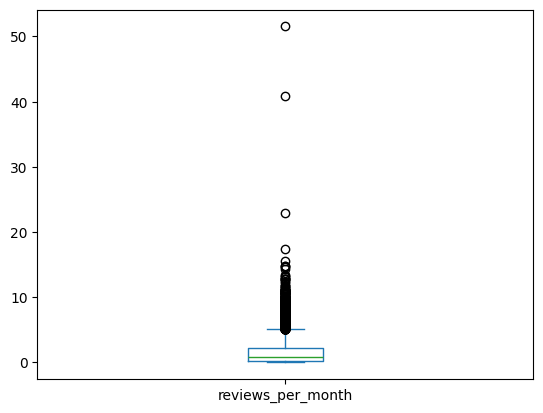

In [80]:
df['reviews_per_month'].plot(kind='box')

In [81]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45595 entries, 0 to 45594
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45595 non-null  int64  
 1   host_id                         45595 non-null  int64  
 2   neighbourhood_group             45595 non-null  object 
 3   latitude                        45595 non-null  float64
 4   longitude                       45595 non-null  float64
 5   room_type                       45595 non-null  object 
 6   price                           45595 non-null  int64  
 7   minimum_nights                  45595 non-null  int64  
 8   number_of_reviews               45595 non-null  int64  
 9   reviews_per_month               45595 non-null  float64
 10  calculated_host_listings_count  45595 non-null  int64  
 11  availability_365                45595 non-null  int64  
 12  number_of_reviews_ltm           

In [83]:
df = pd.get_dummies(df, columns=['neighbourhood_group','room_type'])
df



,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_group_City of Los Angeles,neighbourhood_group_Other Cities,neighbourhood_group_Unincorporated Areas,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,109,521,33.983010,-118.386070,129,30,2,0.01,1,180,0,False,True,False,True,False,False,False
1,2708,3008,34.096250,-118.346050,94,30,40,0.35,2,271,2,True,False,False,False,False,True,False
2,2732,3041,34.004400,-118.480950,179,7,24,0.16,2,360,0,False,True,False,False,False,True,False
3,63416,309512,34.113440,-118.323990,220,2,161,1.02,3,0,23,True,False,False,False,False,True,False
4,2864,3207,33.874900,-118.115150,50,30,0,0.76,1,0,0,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45590,1036572578138800837,272903865,33.994012,-118.040152,392,1,0,0.76,2,68,0,False,True,False,True,False,False,False
45591,1037663899636896646,41272244,33.878159,-118.347681,95,1,0,0.76,1,269,0,False,True,False,True,False,False,False
45592,1036592552558009171,548780760,34.074170,-118.131870,40,1,0,0.76,9,235,0,False,True,False,False,False,True,False
45593,1036598124607548033,521839237,34.146740,-118.341910,216,3,0,0.76,31,269,0,False,True,False,True,False,False,False


In [84]:
df.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'neighbourhood_group_City of Los Angeles',
       'neighbourhood_group_Other Cities',
       'neighbourhood_group_Unincorporated Areas', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

### Normalización de datos

In [85]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler()
X=min_max_scaler.fit_transform(df)

# Kmeans random init

In [86]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters = k, random_state  = 42).fit(df)

In [87]:
print("Points: ", kmeans.labels_)
print("Centroids: ", kmeans.cluster_centers_[0])

Points:  [0 0 0 ... 1 1 1]
Centroids:  [ 3.03629440e+07  1.07752050e+08  3.40499949e+01 -1.18323227e+02
  2.62772696e+02  2.12383855e+01  5.58819794e+01  1.10445955e+00
  1.60476941e+01  1.56314850e+02  8.67334413e+00  5.46756457e-01
  3.69661580e-01  8.35819623e-02  6.92353593e-01  2.81305942e-03
  2.85696019e-01  1.91373284e-02]


In [88]:
print("Score: ", kmeans.inertia_)
print("Score: ", kmeans.score(df))

Score:  1.02903371972084e+38
Score:  -1.02903371972084e+38


In [89]:
wcss = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state  = 42).fit(df)
    wcss.append(kmeans.inertia_)

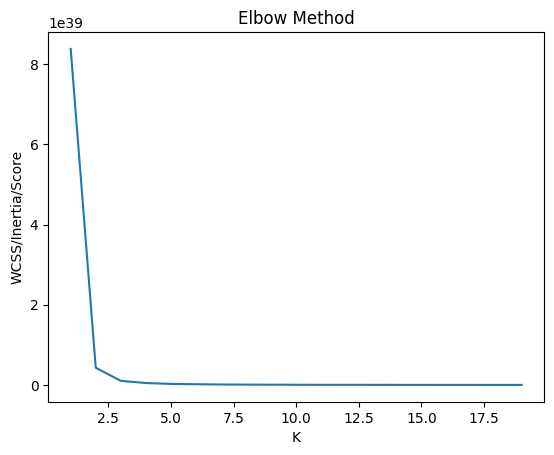

In [90]:
plt.plot(range(1, 20), wcss)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS/Inertia/Score")
plt.show()

In [91]:
model=KMeans(n_clusters=2, init='random')
model= model.fit(df)
grupos = model.predict(df)
centroids=model.cluster_centers_

In [92]:
df['kmeans']=grupos

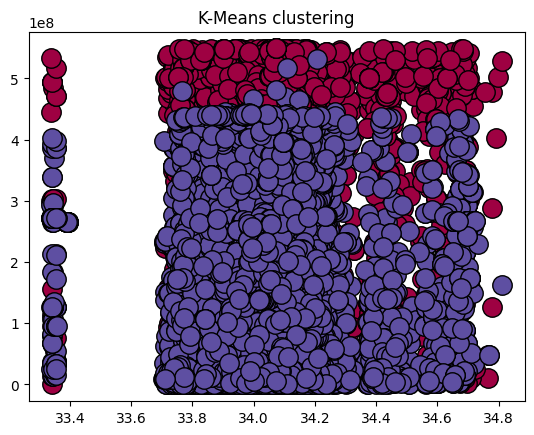

In [93]:
unique_labels = set(grupos)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    xy = df[df['kmeans']==k].values
    plt.plot(xy[:, 2],xy[:, 1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=14,)
plt.title(f"K-Means clustering")
plt.show()

In [94]:
def kmeans(X, k):
    
    # Step 1
    k = 2
    n_samples, _=X.shape
    idx = np.random.choice(n_samples, k, replace=True)
    centroids = X[idx, :]
    idx
    
    while True:
        # Step 2
        from scipy.spatial.distance import cdist
        distances = cdist(X, centroids)
        distances[0:5]

        # Step 3
        points = np.argmin(distances, axis=1)
        points

        # Step 4
        temp_centroids = []
        for cluster in range(k):
            cluster_points = X[points == cluster]
            temp_cluster_centroid = np.mean(cluster_points, axis=0)
            temp_centroids.append(temp_cluster_centroid)
        temp_centroids = np.array(temp_centroids)

        # Step 5
        if ( (centroids == temp_centroids).all() ):
            # Done
            return points, centroids

        else:
            centroids = temp_centroids

In [95]:
centroids

array([[ 8.35359267e+17,  2.65672526e+08,  3.40589837e+01,
        -1.18305922e+02,  3.23864230e+02,  1.38400127e+01,
         9.80526815e+00,  1.40615145e+00,  2.93506529e+01,
         2.15580581e+02,  7.89377852e+00,  4.41557855e-01,
         4.53756834e-01,  1.04685312e-01,  7.94695703e-01,
         3.07046055e-16,  1.91162518e-01,  1.41417792e-02],
       [ 3.03629440e+07,  1.07752050e+08,  3.40499949e+01,
        -1.18323227e+02,  2.62772696e+02,  2.12383855e+01,
         5.58819794e+01,  1.10445955e+00,  1.60476941e+01,
         1.56314850e+02,  8.67334413e+00,  5.46756457e-01,
         3.69661580e-01,  8.35819623e-02,  6.92353593e-01,
         2.81305942e-03,  2.85696019e-01,  1.91373284e-02]])

# Kmeans ++

In [96]:
model=KMeans(n_clusters=2, init='k-means++')
model= model.fit(df)
grupos = model.predict(df)
centroids=model.cluster_centers_

In [97]:
df['labels_kmeans++']=grupos

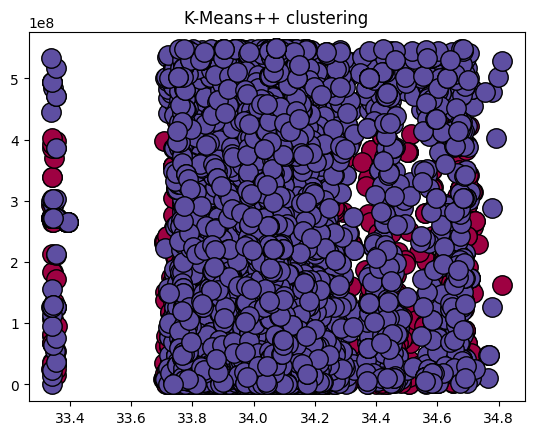

In [98]:
unique_labels = set(grupos)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    xy = df[df['labels_kmeans++']==k].values
    plt.plot(xy[:, 2],xy[:, 1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=14,)
plt.title(f"K-Means++ clustering")
plt.show()

# DBSCAN

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaler=scaler.fit_transform(df)

In [100]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(df_scaler)

In [101]:
# Obtener las asignaciones de clústeres y los etiquetas de ruido
labels = dbscan.labels_

In [102]:
df['labels_dbscan']=labels

In [108]:
# Número de clústeres en los resultados, ignorando el ruido si está presente (-1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Clusters estimados por DBSCAN: %d" % n_clusters_)
print("Numeros estimatos de muestras con ruido: %d" % n_noise_)

Clusters estimados por DBSCAN: 474
Numeros estimatos de muestras con ruido: 23845


In [104]:
df_dbscan=df[df['labels_dbscan']!=-1] 
df_dbscan

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,neighbourhood_group_City of Los Angeles,neighbourhood_group_Other Cities,neighbourhood_group_Unincorporated Areas,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,kmeans,labels_kmeans++,labels_dbscan
0,109,521,33.983010,-118.386070,129,30,2,0.01,1,180,...,False,True,False,True,False,False,False,1,0,4
1,2708,3008,34.096250,-118.346050,94,30,40,0.35,2,271,...,True,False,False,False,False,True,False,1,0,0
2,2732,3041,34.004400,-118.480950,179,7,24,0.16,2,360,...,False,True,False,False,False,True,False,1,0,1
9,6033,11619,34.168870,-118.644780,89,30,20,0.11,6,0,...,True,False,False,True,False,False,False,1,0,2
11,6931,3008,34.094900,-118.347660,109,30,32,0.18,2,194,...,True,False,False,False,False,True,False,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45586,1037575019510875191,72933825,34.095403,-118.377826,936,31,0,0.76,89,177,...,True,False,False,True,False,False,False,0,1,392
45587,1036563233548896568,548780760,34.074345,-118.130647,156,1,0,0.76,9,260,...,False,True,False,True,False,False,False,0,1,224
45592,1036592552558009171,548780760,34.074170,-118.131870,40,1,0,0.76,9,235,...,False,True,False,False,False,True,False,0,1,336
45593,1036598124607548033,521839237,34.146740,-118.341910,216,3,0,0.76,31,269,...,False,True,False,True,False,False,False,0,1,224


In [105]:
labels_dbscan=df_dbscan['labels_dbscan'].values

In [106]:
set(labels_dbscan)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


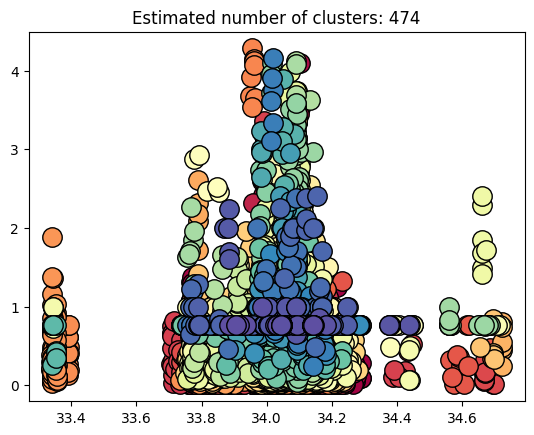

In [111]:
unique_labels = set(labels_dbscan)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:# Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels_dbscan == k
    xy = df_dbscan[df_dbscan['labels_dbscan']==k].values
    plt.plot(xy[:, 2],xy[:, 7],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=14,)
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()